# TP2: Understanding Global feature of high dimensional data

Author: Kelly Larissa Vomo Donfack
## Introduction
How can we combine the barcode and persistence diagram with statistics and machine learning
 - Using persistence Image
 - Persistence Landscape
 - Persistence Entropy
 - Persistence Silhouettes

### Practicals
#### Tools to install
    - giotto-tda
    - Rasper
    - PersistenceImages
    - pip install persim
            Persistence Images
            Bottleneck distance
            Modified Gromov–Hausdorff distance
            Sliced Wasserstein Kernel
            Heat Kernel
            Diagram plotting


In [1]:
#!pip install persim ripser

#### Import Libs

In [2]:
from generate_datasets import make_point_clouds
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

norm = mcolors.Normalize(vmin=0, vmax=2)
cmap = cm.get_cmap('viridis') 

import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from ripser import Rips
from persim import PersImage
from persim import PersistenceImager
import time

import warnings
warnings.filterwarnings('ignore')

/tmp/ipykernel_87283/1716543771.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')


#### Load the dataset
##### The datset we are going to be susing consist of six shape classes: a nit cube, a circle of diameter one, a sphere of diameter 2, three clusters with centers randomly chosen in the unit cube, three clusters within three clusters and a torus

##### Let's generate a synthetic dataset of 10 noisy circles, spheres, and tori, where the effect of noise is to displace the points that sample the surfaces by a random amount in a random direction

#### Cloud data
Data is represented as an unordered sequence of points in a Euclidean n-dimensional space En. When the dataset is of high dimension, the global 'shape' of the data may often provide important information about the underlying phenomena which the data it represents. One type of cloud data is point cloud data.

In [3]:
point_clouds_basic, labels_basic = make_point_clouds(n_samples_per_shape=10, n_points=20, noise=0.5)
point_clouds_basic.shape, labels_basic.shape

((30, 400, 3), (30,))

In [4]:
from gtda.plotting import plot_point_cloud

plot_point_cloud(point_clouds_basic[0])

In [5]:
plot_point_cloud(point_clouds_basic[11])

In [6]:
plot_point_cloud(point_clouds_basic[21])

#### From point clouds to complexes

## Point Clouds and Simplicial Complexes

The most obvious way to convert a collection of points {x_α} in a metric space into a global object 
is to use the point cloud as the vertices of a graph. In this graph, edges are drawn between points 
that lie within a specified distance ε from each other.

While this graph captures connectivity information, it **ignores higher-dimensional features**. 
To capture more structure, we build a **simplicial complex** from the graph.

A **simplicial complex** is a collection of vertices, edges, triangles, and higher-dimensional 
simplices that are "glued together" along faces in a combinatorial way.

We describe two important methods to construct such complexes: the Čech complex and the Rips complex.


##### **Definition 1.1 – Čech Complex (𝒞_ε)**

Given a collection of points {x_α} in Euclidean space ℝⁿ, the Čech complex 𝒞_ε is the abstract 
simplicial complex where a k-simplex is formed for each (k + 1)-tuple of points whose **closed 
ε/2-ball neighborhoods have a point of common intersection**.


##### **Definition 1.2 – Rips Complex (ℛ_ε)**

Given a collection of points {x_α} in Euclidean space ℝⁿ, the Rips complex ℛ_ε is the abstract 
simplicial complex where a k-simplex is formed for each (k + 1)-tuple of points that are 
**pairwise within distance ε**.


## 2.1 Persistence

**Persistence**, is a formal method to distinguish meaningful topological features from noise in a filtered sequence of spaces.

The key idea: given a **parameterized family of spaces**, the **features that persist** over 
a significant range of the parameter are considered **signal**, while those that quickly 
appear and disappear are considered **noise**.


#### Computer H0 and H1 PDs for the vietoris-Rips filtration

Roughly, homology in degree 0 describes
the connectedness of the data; homology in degree 1 detects holes or tunnels; homology
in degree 2 captures voids; and so on. 

In [7]:
rips = Rips(maxdim=1, coeff=2)
diagrams = [rips.fit_transform(data) for data in point_clouds_basic]
diagrams_h0 = [rips.fit_transform(data)[0] for data in point_clouds_basic]
diagrams_h1 = [rips.fit_transform(data)[1] for data in point_clouds_basic]

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


#### Persistence diagram

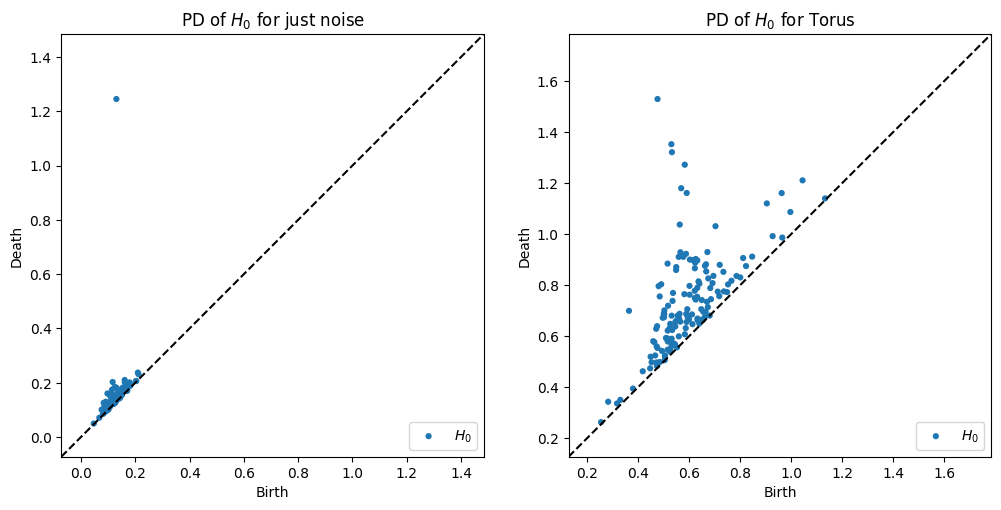

In [8]:
plt.figure(figsize=(12,6))
plt.subplot(121)

rips.plot(diagrams_h1[0], show=False)
plt.title("PD of $H_0$ for just noise")

plt.subplot(122)
rips.plot(diagrams_h1[-1], show=False)
plt.title("PD of $H_0$ for Torus")

plt.show()

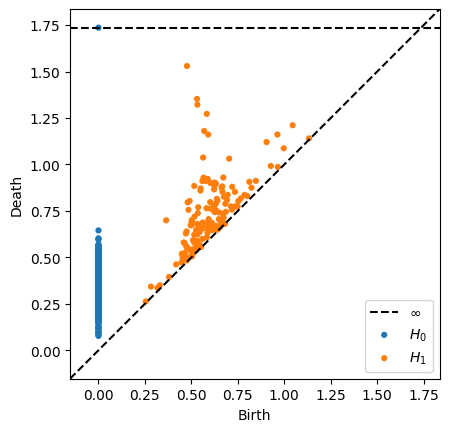

In [9]:
from persim import plot_diagrams
plot_diagrams(diagrams[-1], show=True)

#### Persistence Barcode
##### https://www2.math.upenn.edu/~ghrist/preprints/barcodes.pdf
A barcode is a graphical representation of Hk(C; F) as a collection of horizontal line
segments in a plane whose horizontal axis corresponds to the parameter and whose
vertical axis represents an (arbitrary) ordering of homology generators. 

In [10]:
import matplotlib.pyplot as plt


def barcodes(birth,death,label, **kwargs):
    finite_bars = death[death != np.inf]
    if len(finite_bars) > 0:
        inf_end = 2 * max(finite_bars)
    else:
        inf_end = 2
    death[death == np.inf] = inf_end
    plt.figure(figsize=kwargs.get('figsize', (10, 5)))
    for i, (b, d,r) in enumerate(zip(birth, death,label)):
        color = cmap(norm(r))
        if d == inf_end:
            plt.plot([b, d], [i, i], color='k', lw=kwargs.get('linewidth', 2))
        else:
            plt.plot([b, d], [i, i], color=color, lw=kwargs.get('linewidth', 2))
    plt.title(kwargs.get('title', 'Persistence Barcode'))
    plt.xlabel(kwargs.get('xlabel', 'Filtration Value'))
    plt.yticks([])
    plt.tight_layout()
    plt.show()
def plot_barcode(diag, dim=3):
    """
    Plot the barcode for a persistence diagram using matplotlib
    ----------
    diag: np.array: of shape (num_features, 3), i.e. each feature is
           a triplet of (birth, death, dim) as returned by e.g.
           VietorisRipsPersistence
    dim: int: Dimension for which to plot
    **kwargs
    Returns
    -------
    None.

    """
    if dim == 3:
        birth = diag[:, 0]
        death = diag[:, 1]
        label = diag[:, 2]
        barcodes(birth,death,label)
    else:
        diag_dim = diag[diag[:, 2] == dim]
        birth = diag_dim[:, 0]
        death = diag_dim[:, 1]
        label = diag[:, 2]
        barcodes(birth,death,label)

In [11]:
#plot_barcode(diagrams_basic[0], 0)

In [12]:
#plot_barcode(diagrams_basic[0], 2)

#### Why vectorization of PD matters

## 🔢 Persistence Diagrams in a Metric Space

- Persistence diagrams form a **metric space**, often with bottleneck or p-Wasserstein distances.
- However, many **statistical and machine learning** methods require more than just distances — they need **vector spaces**, **inner products**, etc.

---

## ⚖️ Averages Are Not Unique

- The average of persistence diagrams is **not always unique**.
- Example:
  - Diagram A: (10,20), (12,22)
  - Diagram B: (10,22), (12,20)
  - Possible averages:
    - (11,20), (11,22) _or_
    - (10,21), (12,21)

This ambiguity complicates statistical analysis.


## 🧠 Why Vectorize Persistence Diagrams?

- ✅ **Averaging** becomes well-defined.
- ✅ You can compute **variances** and apply the **Central Limit Theorem**.
- ✅ Enables use of **machine learning models** that require vector inputs:
  - Support Vector Machines (SVMs)
  - Neural Networks
  - Decision Trees
  - Dimensionality Reduction (e.g., PCA)
  - Feature Selection (e.g., which birth-death points matter most?)

➡️ Vectorization transforms diagrams into a standard input format — vectors of fixed size.


## 📚 Suggested Reading

- **Persistence Landscapes** paper (Bubenik, 2015):
  - https://www.jmlr.org/papers/volume16/bubenik15a/bubenik15a.pdf

- **Persistence Images** paper (Adams et al., 2017):
  - https://www.jmlr.org/papers/volume18/16-337/16-337.pdf


#### Using H1

## 📘 Persistence Images  From persistence diagram to persistence images Converting PD to vector
 
 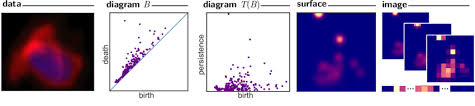
 Pipeline

- Let B be a PD in birth-death coordinates.
- Let T : R2 → R2 be the linear transformation T(x, y) = (x, y − x), and 
- let T(B) be the transformed **multiset** in birth persistence coordinates, where each point (x, y) ∈ B corresponds to a point (x, y − x) ∈ T(B).
- Let φu : R2 → R be a differentiable probability distribution with mean u = (ux, uy) ∈ R2. 
- Distribution to be the normalized symmetric Gaussian φu = gu with mean u and variance σ

#### Definition 1: Persistence Surface


#### Definition 2: Persistence Image (PI)

The **persistence image** is obtained by discretizing the persistence surface over a fixed grid. Formally, it is defined as the integral of the persistence surface $\rho(z)$ over each grid cell, which produces a vector representation of the persistence diagram.



### Key Steps:
1. **Weighting**: Apply a function to control the importance of features based on birth-death pairs.
2. **Smoothing**: Convolve weighted points with a Gaussian kernel.
3. **Discretization**: Integrate the smoothed function over grid cells to produce a fixed-size image.
4. **Stability**: The resulting vectors are stable under perturbations in the persistence diagram.




### Application

#### 1. Default

In [13]:
pimgr = PersistenceImager(pixel_size=1)


In [14]:
# The `fit()` method can be called on one or more (*,2) numpy arrays to automatically determine the miniumum birth and
# persistence ranges needed to capture all persistence pairs. The ranges and resolution are automatically adjusted to
# accomodate the specified pixel size.
pimgr.fit(diagrams_h1)
imgs = pimgr.transform(diagrams_h1)

In [15]:
pimgr

PersistenceImager(birth_range=(-0.4183537410572171, 1.5816462589427829), pers_range=(-0.40563076734542847, 1.5943692326545715), pixel_size=1, weight=persistence, weight_params={'n': 1.0}, kernel=gaussian, kernel_params={'sigma': [[1.0, 0.0], [0.0, 1.0]]})

In [16]:
imgs_array = np.array([img.flatten() for img in imgs])

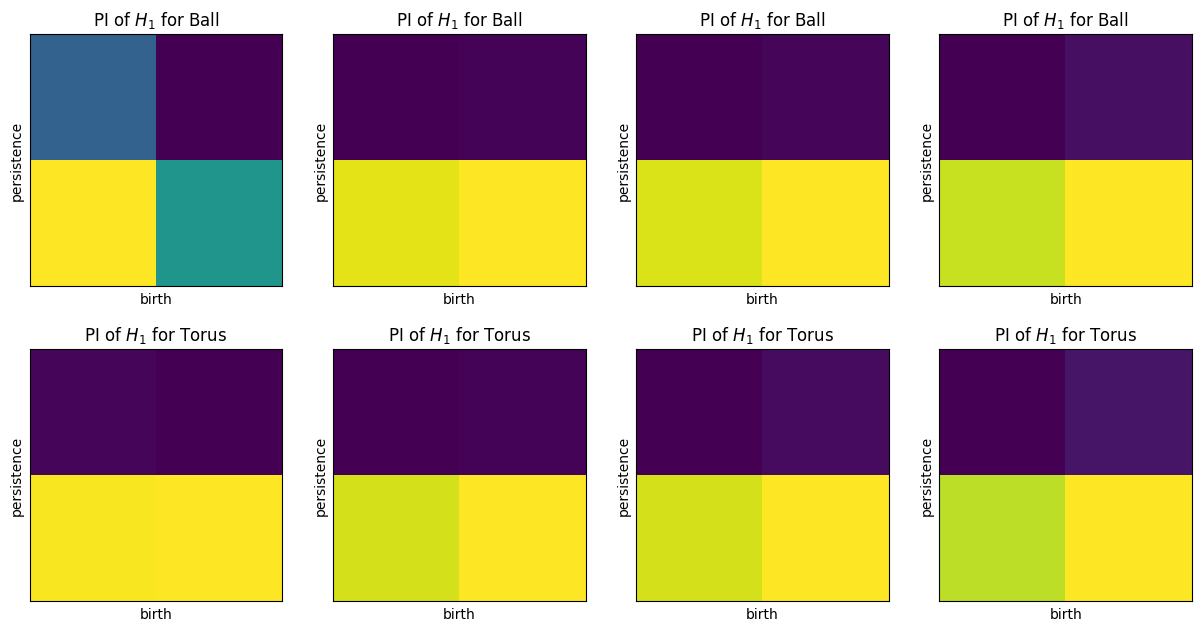

In [17]:
plt.figure(figsize=(15,7.5))

for i in range(4):
    ax = plt.subplot(240+i+1)
    pimgr.plot_image(imgs[i], ax)
    plt.title("PI of $H_1$ for Circle")

for i in range(4):
    ax = plt.subplot(240+i+1)
    pimgr.plot_image(imgs[19+i], ax)
    plt.title("PI of $H_1$ for Ball")

for i in range(4):
    ax = plt.subplot(240+i+5)
    pimgr.plot_image(imgs[-(i+1)], ax)
    plt.title("PI of $H_1$ for Torus")

#### What is Logistic regression

- Logistic regression is a supervised machine learning algorithm used for classification tasks where the goal is to predict the probability that an instance belongs to a given class or not. 
- Logistic regression is used for binary classification where we use sigmoid function, that takes input as independent variables and produces a probability value between 0 and 1

In [18]:
#Splitting the dataset into trainning and testing
X_train, X_test, y_train, y_test = train_test_split(imgs_array, labels_basic, test_size=0.40, random_state=42)


In [19]:
# Classification
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [20]:
lr.score(X_test, y_test)

1.0

In [21]:
#### Time calculation

In [22]:
pimgr = PersistenceImager()

pimgr.fit(diagrams_h1)

In [23]:
start_time = time.time()
pimgr.transform(diagrams_h1, n_jobs=1)
print("Execution time in serial: %g sec." % (time.time() - start_time))

Execution time in serial: 0.0589855 sec.


In [24]:
start_time = time.time()
pimgr.transform(diagrams_h1, n_jobs=-1)
print("Execution time in parallel: %g sec." % (time.time() - start_time))

Execution time in parallel: 1.24659 sec.


### Parameters Modification

In [25]:
pimgr.pixel_size = 0.1
pimgr.birth_range = (0, 2)
pimgr.fit(diagrams_h1)
imgs = pimgr.transform(diagrams_h1)

In [26]:
pimgr

PersistenceImager(birth_range=(-0.01835374105721721, 1.181646258942783), pers_range=(-0.005630767345428556, 1.1943692326545716), pixel_size=0.1, weight=persistence, weight_params={'n': 1.0}, kernel=gaussian, kernel_params={'sigma': [[1.0, 0.0], [0.0, 1.0]]})

In [27]:
imgs_array = np.array([img.flatten() for img in imgs])

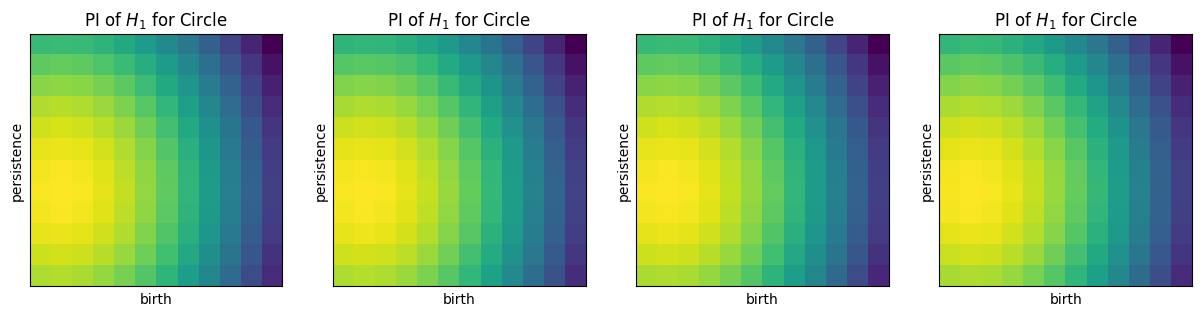

In [28]:
plt.figure(figsize=(15,7.5))

for i in range(4):
    ax = plt.subplot(240+i+1)
    pimgr.plot_image(imgs[i+1], ax)
    plt.title("PI of $H_1$ for Circle")



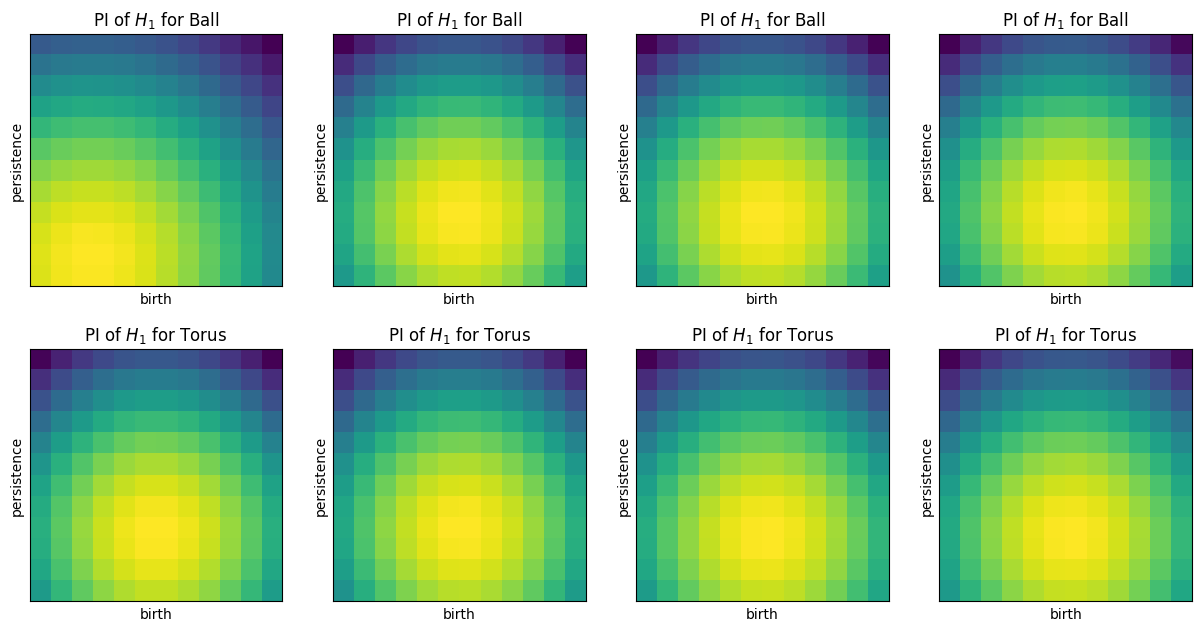

In [29]:
plt.figure(figsize=(15,7.5))
for i in range(4):
    ax = plt.subplot(240+i+1)
    pimgr.plot_image(imgs[19+i], ax)
    plt.title("PI of $H_1$ for Ball")

for i in range(4):
    ax = plt.subplot(240+i+5)
    pimgr.plot_image(imgs[-(i+1)], ax)
    plt.title("PI of $H_1$ for Torus")

#### What is Logistic regression

- Logistic regression is a supervised machine learning algorithm used for classification tasks where the goal is to predict the probability that an instance belongs to a given class or not. 
- Logistic regression is used for binary classification where we use sigmoid function, that takes input as independent variables and produces a probability value between 0 and 1

In [30]:
#Splitting the dataset into trainning and testing
X_train, X_test, y_train, y_test = train_test_split(imgs_array, labels_basic, test_size=0.40, random_state=42)


In [31]:
# Classification
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [32]:
lr.score(X_test, y_test)

0.6666666666666666

### New dataset

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


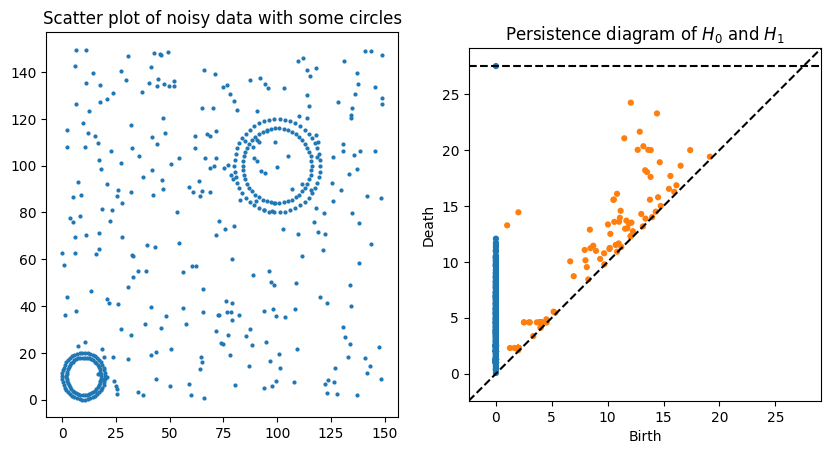

In [33]:
# lots of random noise and 2 circles
data = np.concatenate([150 * np.random.random((300,2)),
                       10 + 10 * datasets.make_circles(n_samples=100)[0],
                       100 + 20 * datasets.make_circles(n_samples=100)[0]])

rips = Rips()
dgms = rips.fit_transform(data)
H0_dgm = dgms[0]
H1_dgm = dgms[1]

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.scatter(data[:,0], data[:,1], s=4)
plt.title("Scatter plot of noisy data with some circles")

plt.subplot(122)
rips.plot(dgms, legend=False, show=False)
plt.title("Persistence diagram of $H_0$ and $H_1$")
plt.show()

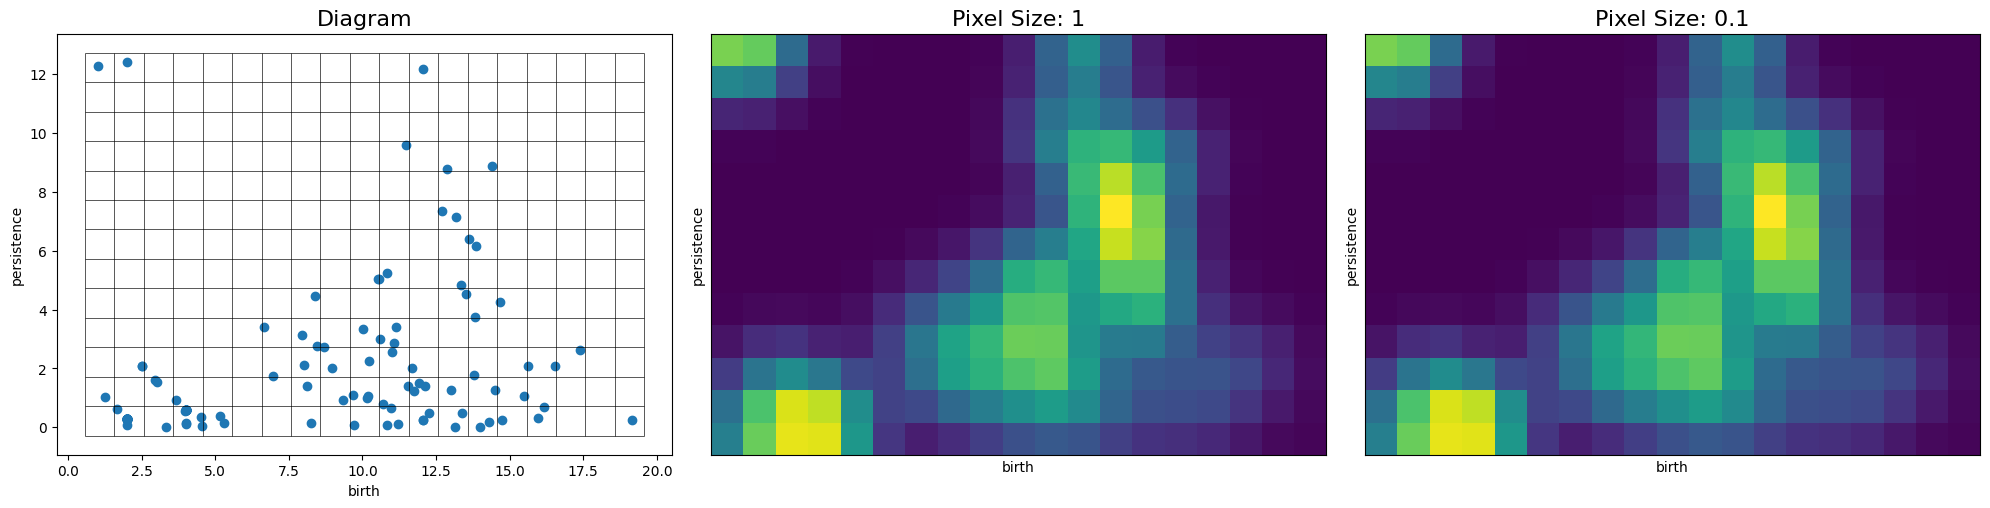

In [34]:
pimgr = PersistenceImager(pixel_size=1)
pimgr.fit(H1_dgm)

fig, axs = plt.subplots(1, 3, figsize=(20,5))
pimgr.plot_diagram(H1_dgm, skew=True, ax=axs[0])
axs[0].set_title('Diagram', fontsize=16)

dgm_pixel1 = pimgr.transform(H1_dgm)
pimgr.plot_image(dgm_pixel1, ax=axs[1])
axs[1].set_title('Pixel Size: 1', fontsize=16)

dgm_pixel01 = pimgr.transform(H1_dgm)
pimgr.pixel_size = 0.1
pimgr.plot_image(dgm_pixel01, ax=axs[2])
axs[2].set_title('Pixel Size: 0.1', fontsize=16)

plt.tight_layout()

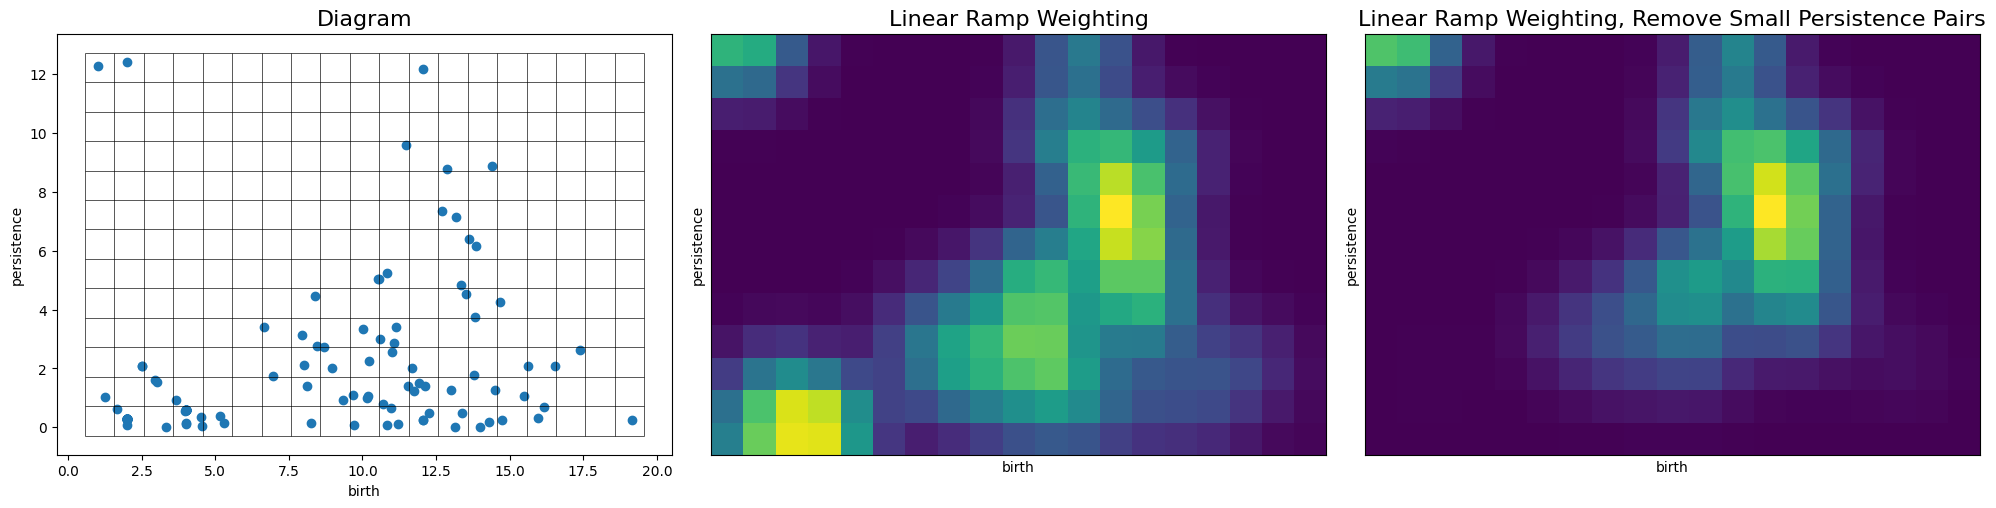

In [35]:
# Modify the weight funtion
from persim.images_weights import linear_ramp

pimgr.pixel_size = 1
pimgr.weight = linear_ramp
pimgr.weight_params = {'low':0.0, 'high':1.0, 'start':0.0, 'end':10.0}

fig, axs = plt.subplots(1, 3, figsize=(20,5))
pimgr.plot_diagram(H1_dgm, skew=True, ax=axs[0])
axs[0].set_title('Diagram', fontsize=16)

pimgr.plot_image(pimgr.transform(H1_dgm), ax=axs[1])
axs[1].set_title('Linear Ramp Weighting', fontsize=16)

pimgr.weight_params = {'low':0.0, 'high':1.0, 'start':2.0, 'end':10.0}
pimgr.plot_image(pimgr.transform(H1_dgm), ax=axs[2])
axs[2].set_title('Linear Ramp Weighting, Remove Small Persistence Pairs', fontsize=16)

plt.tight_layout()

## Modify the persistence Pair Kernel
Reduce the standard deviate of the kernel used

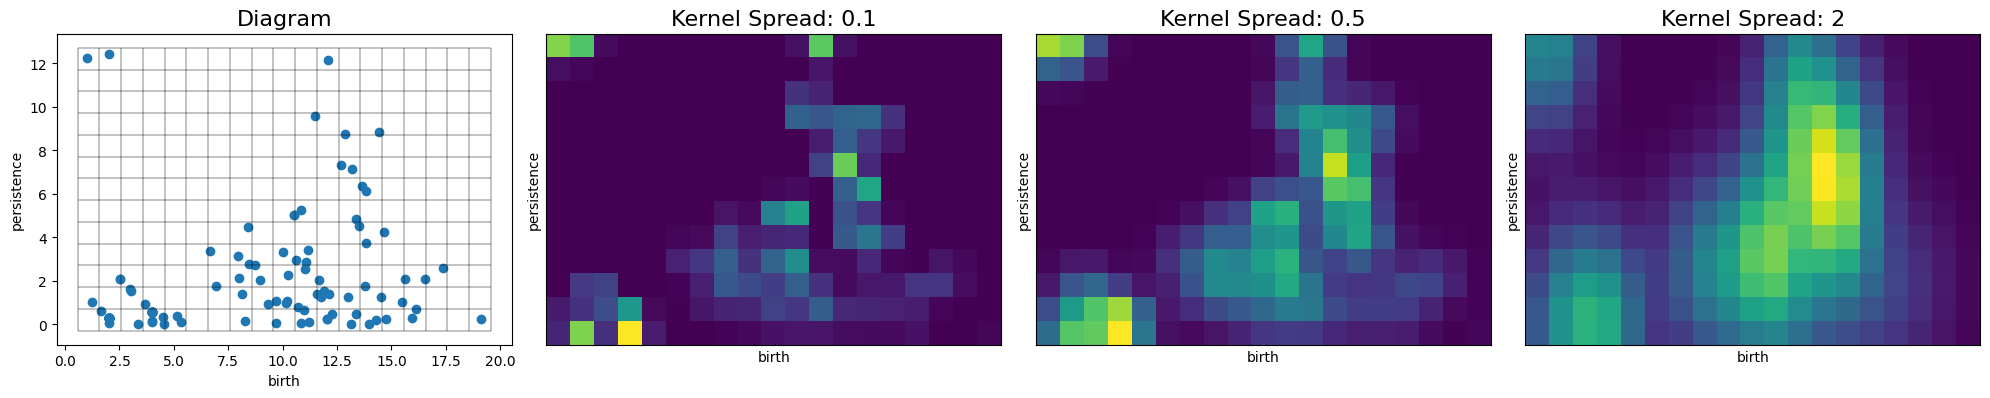

In [36]:
# For the default bivariate normal Gaussian kernel, the parameter controlling the spread (sigma) may be specified
# either by a float or a 2x2 covariance matrix
pimgr = PersistenceImager(pixel_size=1)
pimgr.fit(H1_dgm)

fig, axs = plt.subplots(1, 4, figsize=(20,5))
pimgr.kernel_params = {'sigma': .1}
pimgr.plot_diagram(H1_dgm, skew=True, ax=axs[0])
axs[0].set_title('Diagram', fontsize=16)

pimgr.kernel_params = {'sigma': 0.1}
pimgr.plot_image(pimgr.transform(H1_dgm), ax=axs[1])
axs[1].set_title('Kernel Spread: 0.1', fontsize=16)

pimgr.kernel_params = {'sigma': .5}
pimgr.plot_image(pimgr.transform(H1_dgm), ax=axs[2])
axs[2].set_title('Kernel Spread: 0.5', fontsize=16)

# Non-isotropic, standard bivariate Gaussian with greater spread along the persistence axis
pimgr.kernel_params = {'sigma': np.array([[1, 0],[0, 6]])}
pimgr.plot_image(pimgr.transform(H1_dgm), ax=axs[3])
axs[3].set_title('Kernel Spread: 2', fontsize=16)

plt.tight_layout()

<Axes: xlabel='birth', ylabel='persistence'>

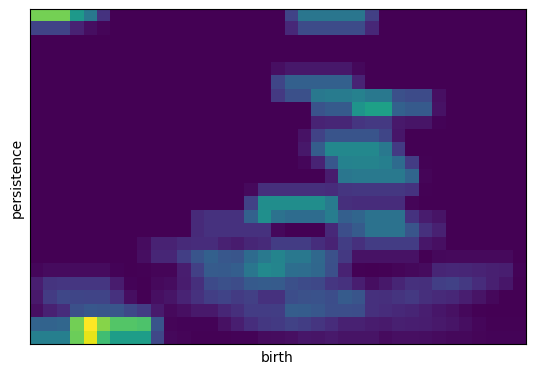

In [37]:
# A valid kernel is a python function of the form kernel(x, y, mu=(birth, persistence), **kwargs) defining a
# cumulative distribution function such that kernel(x, y) = P(X <= x, Y <=y), where x and y are numpy arrays of equal length.
# The required parameter mu defines the dependance of the kernel on the location of a persistence pair and is usually
# taken to be the mean of the probability distribution function associated to kernel CDF.

# Example of a custom kernel which defines the cumulative distribution function for the uniform probability density
# with value 1/(width*height) over the region [mu[0]-width/2, mu[0]+width/2] x [mu[1]-height/2, mu[1]+height/2]
def uniform_kernel(x, y, mu=None, width=1, height=1):
    w1 = np.maximum(x - (mu[0] - width/2), 0)
    h1 = np.maximum(y - (mu[1] - height/2), 0)

    w = np.minimum(w1, width)
    h = np.minimum(h1, height)

    return w*h / (width*height)

# Construct a PersistenceImager() object that uses the uniform distribution kernel supported on a rectangular region
pimgr = PersistenceImager(pixel_size=.5, kernel=uniform_kernel, kernel_params={'width': 3, 'height': 1})
pimgr.fit(H1_dgm)
pimgr.plot_image(pimgr.transform(H1_dgm))

### Persistence Landscape

In [38]:
from persim.landscapes import PersLandscapeExact
from persim.landscapes import plot_landscape_simple
from persim.landscapes import PersistenceLandscaper
from persim import plot_diagrams


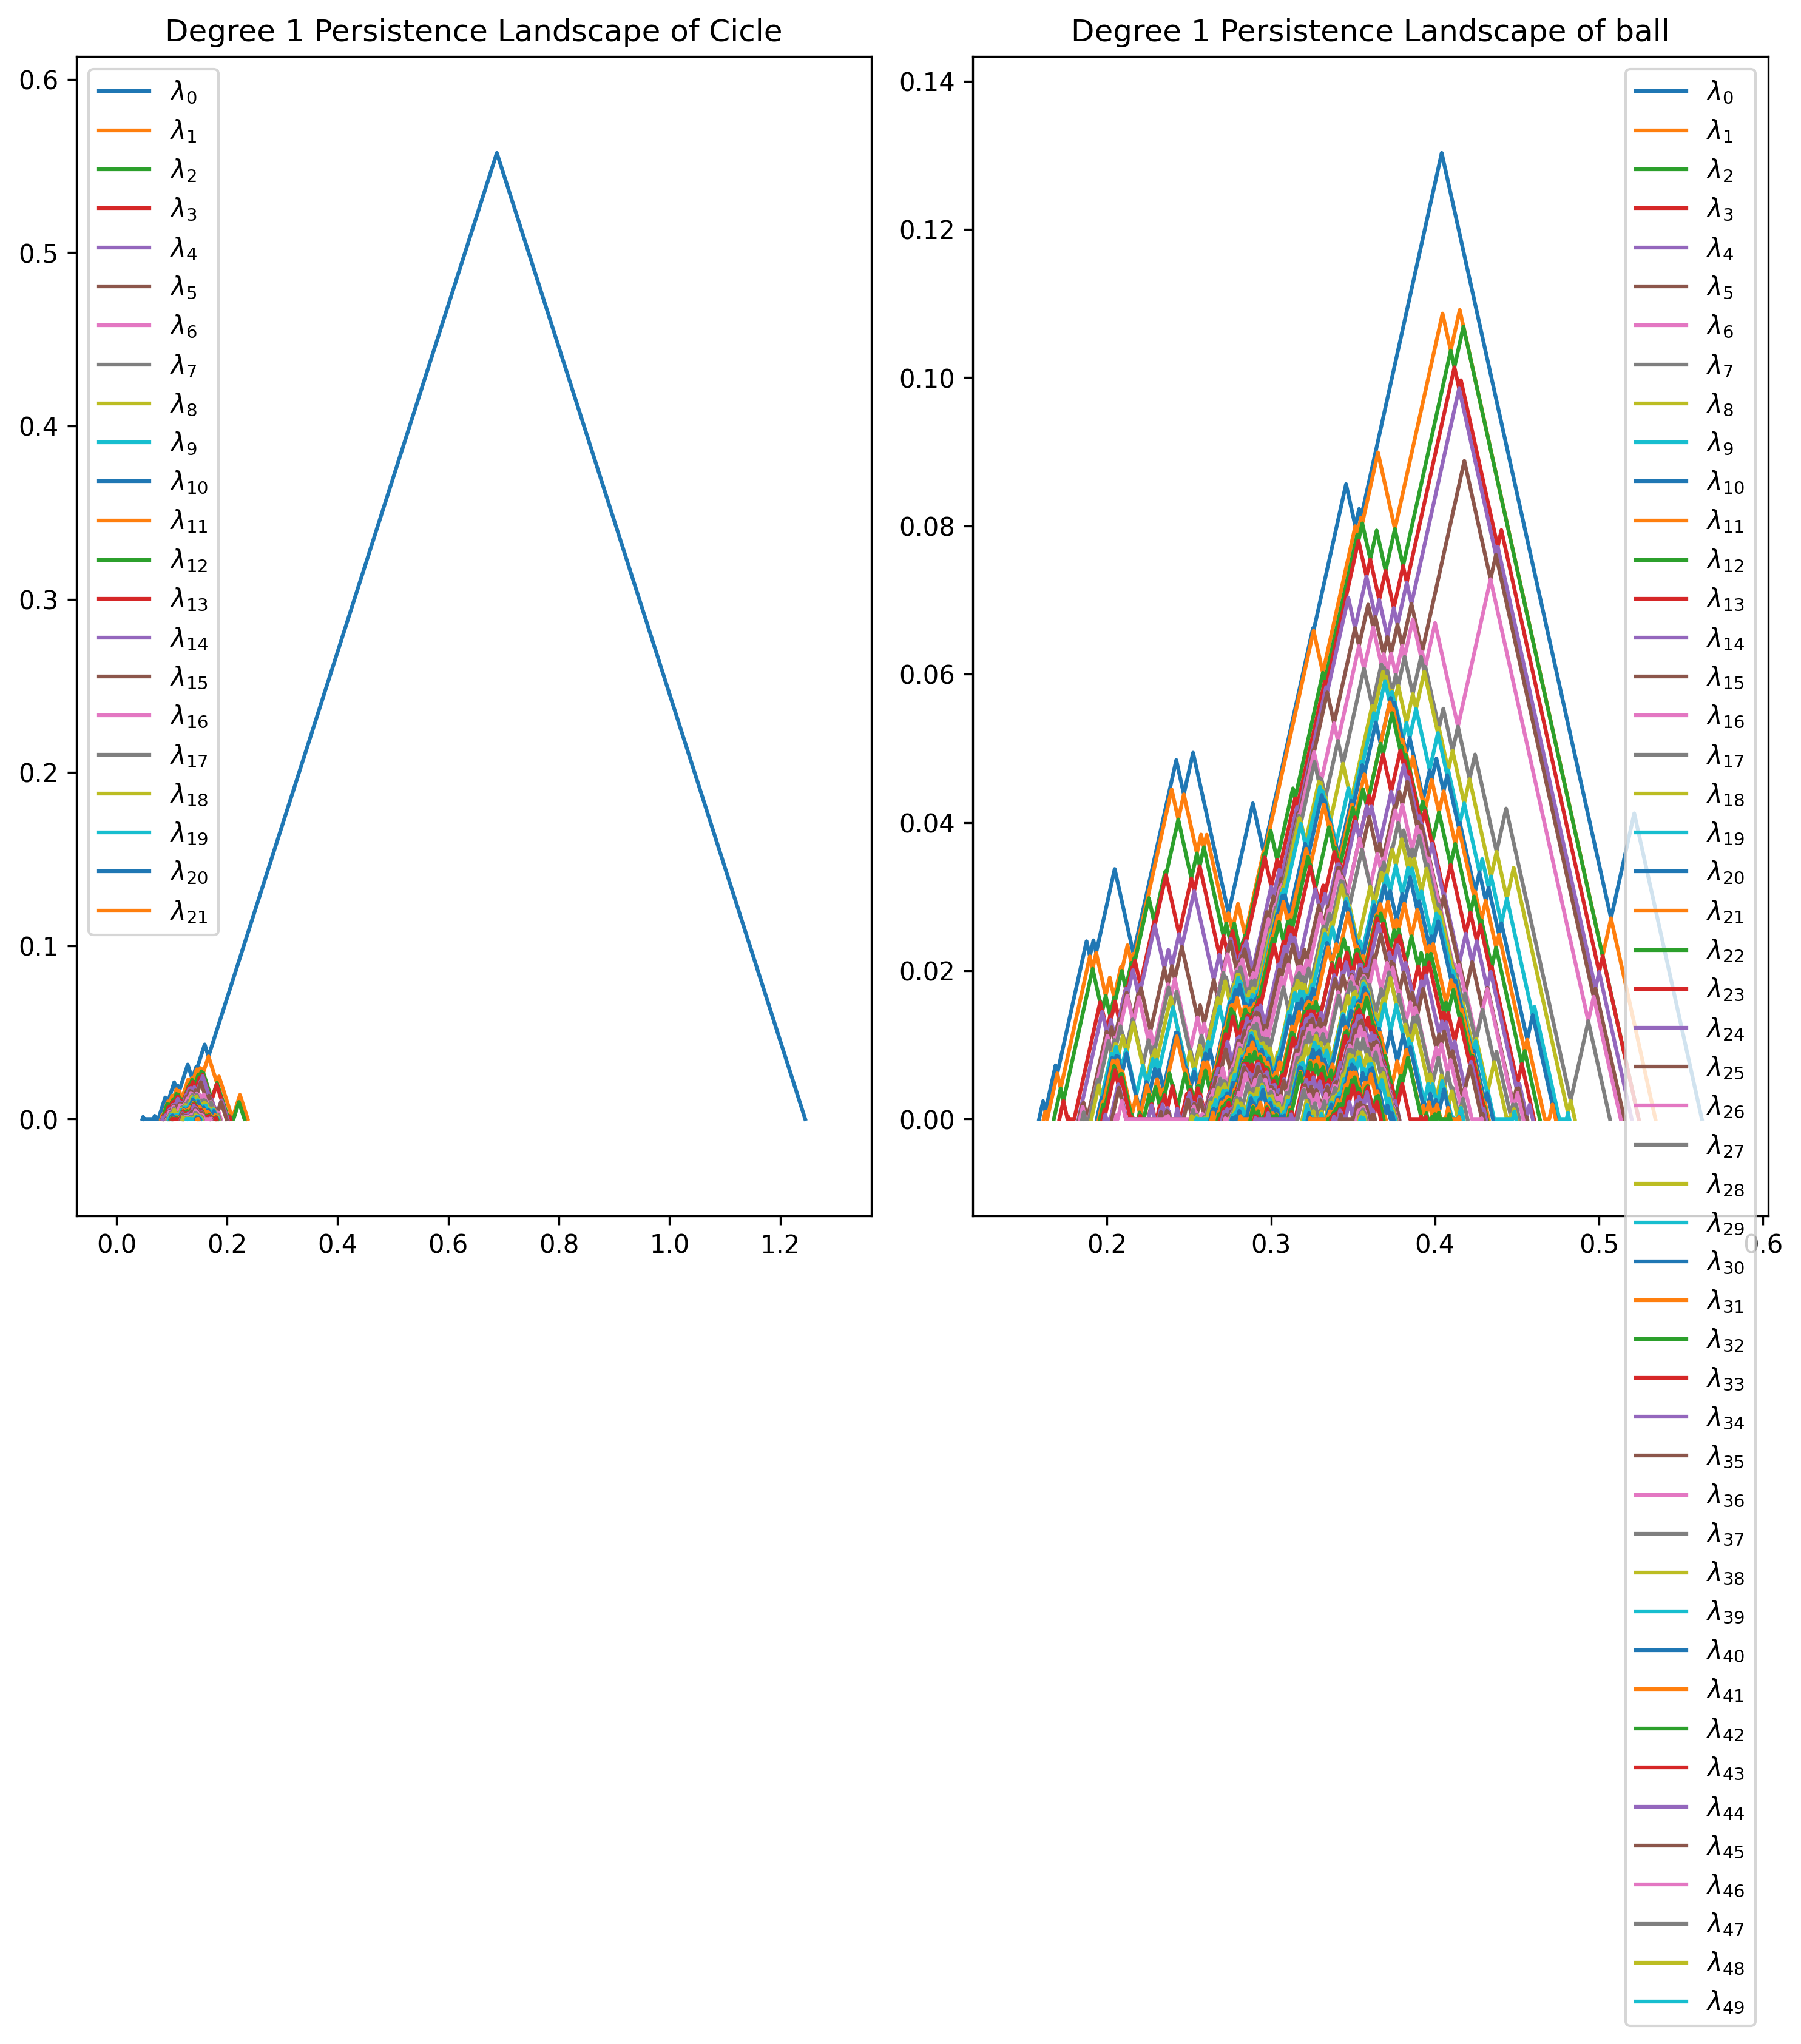

In [39]:
fig, axs = plt.subplots(1, 2, dpi=300)
fig.set_size_inches(10, 10)

plot_landscape_simple(PersLandscapeExact(diagrams[0], hom_deg=1),
                             title="Degree 1 Persistence Landscape of Cicle", ax=axs[0])

plot_landscape_simple(PersLandscapeExact(diagrams[11], hom_deg=1),
                            title="Degree 1 Persistence Landscape of ball", ax=axs[1])

fig.tight_layout()